# 專案目標:判斷怎樣的商品特徵會是成功的

1. 匯入數據&資料前處理
2. 定義成功"Y"
3. 視覺化出圖 
4. 模型

## 1.匯入數據&資料前處理
- 銷售數據
- 商品資料
    - 指定欄位內容為多少時保留: column_filter
    - 把所有資料merge在一起

In [1]:
# 銷售數據
import pandas as pd

# 通常excel 黨比較不會有編碼的問題作為干擾
dataset_sales = pd.read_excel(r'./高雄駁2銷售數據112_9_113_04.xlsx' )
#print(dataset_sales)

ready_to_drop_column = ['品項']
df_sales_drop = dataset_sales.drop(columns = ready_to_drop_column)
df_sales_drop.head()

,編號,112/9,112/10,112/11,112/12,113/1,113/2,113/3,113/4
0,1,3,5,6,10,1,1,1,7
1,2,1,0,2,3,7,2,0,5
2,3,2,3,3,3,3,2,2,2
3,4,46,34,20,40,0,5,42,40
4,5,4,1,1,6,4,2,6,9


In [2]:
# 商品數據
dataset_product = pd.read_excel(r'./一坨爛泥商品詳細資訊成本_利潤_商品類別.xlsx')
# drop掉商品名稱
dataset_product = dataset_product.drop(columns=['商品名稱'])
dataset_product.head()

# 指定要篩選的欄位名稱
column_to_filter = '抽成 (6/4) 1=抽，0=不抽'
# 只保留指定欄位數值為 1 的行
dataset_product_cleaned = dataset_product[dataset_product[column_to_filter] == 1]
#保留完之後 drop掉
dataset_product_cleaned = dataset_product_cleaned.drop(columns = ['抽成 (6/4) 1=抽，0=不抽'])
dataset_product_cleaned

,商品編號,商品售價,商品成本,淨利潤,商品類型,內容類型
0,1,250,66,84.0,胸章,醜萌
1,2,250,56,94.0,胸章,醜萌
2,3,250,76,74.0,胸章,醜萌
3,4,60,5,31.0,紙品,厭世
4,5,60,5,31.0,紙品,醜萌
5,6,60,6,30.0,紙品,醜萌
6,7,60,5,31.0,紙品,語錄型
7,8,60,5,31.0,紙品,語錄型
8,9,60,5,31.0,紙品,語錄型
9,10,60,5,31.0,紙品,語錄型


把商品數據 和 銷售數據做合併   
<font color=yellow>dataset_product_cleaned </font>供你比對:encoded/尚未encoded  
<font color=yellow>dataset_product_info </font>把尚未 encoded 刪掉  


In [3]:

# 商品數據_labael encoding 
from sklearn.preprocessing import LabelEncoder

# 指定需要做encoding的欄位
columns_to_encode = ['商品類型','內容類型']

Label_encoder = LabelEncoder()

for columns in columns_to_encode:
    dataset_product_cleaned[columns + '_encoded'] = Label_encoder.fit_transform(dataset_product_cleaned[columns])

dataset_product_cleaned.head()

,商品編號,商品售價,商品成本,淨利潤,商品類型,內容類型,商品類型_encoded,內容類型_encoded
0,1,250,66,84.0,胸章,醜萌,3,4
1,2,250,56,94.0,胸章,醜萌,3,4
2,3,250,76,74.0,胸章,醜萌,3,4
3,4,60,5,31.0,紙品,厭世,2,2
4,5,60,5,31.0,紙品,醜萌,2,4


In [4]:
dataset_product_info = dataset_product_cleaned.drop(columns=['商品類型','內容類型'])
dataset_product_info.head()

,商品編號,商品售價,商品成本,淨利潤,商品類型_encoded,內容類型_encoded
0,1,250,66,84.0,3,4
1,2,250,56,94.0,3,4
2,3,250,76,74.0,3,4
3,4,60,5,31.0,2,2
4,5,60,5,31.0,2,4


1. 把淨利潤提取出來: <font color= yellow>data_net_income </font>
2. 跟商品銷售數量 merge後做相乘 : <font color= yellow>merge_product_selling</font>

In [5]:
import pandas as pd
dropping_column =["商品售價","商品成本","商品類型_encoded","內容類型_encoded"]
data_net_income = dataset_product_info.drop(columns=dropping_column)
data_net_income.rename(columns={"商品編號":"編號"}, inplace=True)
data_net_income.head()


,編號,淨利潤
0,1,84.0
1,2,94.0
2,3,74.0
3,4,31.0
4,5,31.0


In [6]:
import pandas as pd
merge_product_selling = pd.merge(df_sales_drop, data_net_income, on="編號")

base_column = "淨利潤"

for column in merge_product_selling:
    if column !="編號" and column != base_column:
        merge_product_selling[column] = merge_product_selling[column] * merge_product_selling[base_column] 

merge_product_selling

,編號,112/9,112/10,112/11,112/12,113/1,113/2,113/3,113/4,淨利潤
0,1,252.0,420.0,504.0,840.0,84.0,84.0,84.0,588.0,84.0
1,2,94.0,0.0,188.0,282.0,658.0,188.0,0.0,470.0,94.0
2,3,148.0,222.0,222.0,222.0,222.0,148.0,148.0,148.0,74.0
3,4,1426.0,1054.0,620.0,1240.0,0.0,155.0,1302.0,1240.0,31.0
4,5,124.0,31.0,31.0,186.0,124.0,62.0,186.0,279.0,31.0
5,6,150.0,90.0,150.0,120.0,90.0,0.0,120.0,60.0,30.0
6,7,155.0,31.0,31.0,0.0,0.0,0.0,0.0,31.0,31.0
7,8,31.0,0.0,0.0,0.0,31.0,0.0,124.0,0.0,31.0
8,9,0.0,93.0,62.0,31.0,31.0,31.0,62.0,31.0,31.0
9,10,124.0,62.0,31.0,0.0,31.0,31.0,62.0,0.0,31.0


把銷售利潤<font color=yellow>merge_product_selling </font> +<br> 商品類型encoded 內容類別<font color=yellow>dataset_product_catagory </font>做合併=<br>  <font color=yellow>merge_product_selling </font> 

In [7]:
import pandas as pd
ready_to_drop = ["商品售價","商品成本","淨利潤"]
dataset_product_catagory = dataset_product_info.drop(columns= ready_to_drop)
dataset_product_catagory.rename(columns={"商品編號":"編號"},inplace=True)

merge_product_selling = pd.merge(merge_product_selling, dataset_product_catagory, on="編號")
merge_product_selling

,編號,112/9,112/10,112/11,112/12,113/1,113/2,113/3,113/4,淨利潤,商品類型_encoded,內容類型_encoded
0,1,252.0,420.0,504.0,840.0,84.0,84.0,84.0,588.0,84.0,3,4
1,2,94.0,0.0,188.0,282.0,658.0,188.0,0.0,470.0,94.0,3,4
2,3,148.0,222.0,222.0,222.0,222.0,148.0,148.0,148.0,74.0,3,4
3,4,1426.0,1054.0,620.0,1240.0,0.0,155.0,1302.0,1240.0,31.0,2,2
4,5,124.0,31.0,31.0,186.0,124.0,62.0,186.0,279.0,31.0,2,4
5,6,150.0,90.0,150.0,120.0,90.0,0.0,120.0,60.0,30.0,2,4
6,7,155.0,31.0,31.0,0.0,0.0,0.0,0.0,31.0,31.0,2,3
7,8,31.0,0.0,0.0,0.0,31.0,0.0,124.0,0.0,31.0,2,3
8,9,0.0,93.0,62.0,31.0,31.0,31.0,62.0,31.0,31.0,2,3
9,10,124.0,62.0,31.0,0.0,31.0,31.0,62.0,0.0,31.0,2,3


1. 把商品成本、商品售價 取出  <font color= yellow>dataset_product_cleaned</font>
2. 和銷售數據 <font color= yellow>merge_product_selling</font> merge: <font color= yellow>merge_all </font>目前的大表

In [8]:
dataset_product_cleaned.rename(columns={"商品編號":"編號"},inplace=True)
drop_columns_for_info= ["淨利潤","商品類型","內容類型","商品類型_encoded","內容類型_encoded"]
dataset_product_cleaned = dataset_product_cleaned.drop(columns=drop_columns_for_info)
merge_all = pd.merge(merge_product_selling, dataset_product_cleaned, on="編號")
merge_all


,編號,112/9,112/10,112/11,112/12,113/1,113/2,113/3,113/4,淨利潤,商品類型_encoded,內容類型_encoded,商品售價,商品成本
0,1,252.0,420.0,504.0,840.0,84.0,84.0,84.0,588.0,84.0,3,4,250,66
1,2,94.0,0.0,188.0,282.0,658.0,188.0,0.0,470.0,94.0,3,4,250,56
2,3,148.0,222.0,222.0,222.0,222.0,148.0,148.0,148.0,74.0,3,4,250,76
3,4,1426.0,1054.0,620.0,1240.0,0.0,155.0,1302.0,1240.0,31.0,2,2,60,5
4,5,124.0,31.0,31.0,186.0,124.0,62.0,186.0,279.0,31.0,2,4,60,5
5,6,150.0,90.0,150.0,120.0,90.0,0.0,120.0,60.0,30.0,2,4,60,6
6,7,155.0,31.0,31.0,0.0,0.0,0.0,0.0,31.0,31.0,2,3,60,5
7,8,31.0,0.0,0.0,0.0,31.0,0.0,124.0,0.0,31.0,2,3,60,5
8,9,0.0,93.0,62.0,31.0,31.0,31.0,62.0,31.0,31.0,2,3,60,5
9,10,124.0,62.0,31.0,0.0,31.0,31.0,62.0,0.0,31.0,2,3,60,5


## 2. 定義成功Y 
### 製造欄位 評估Y(分類)之指標["平均月銷售(淨利潤)"] 
把銷售利潤變為單獨欄位 有利潤的的加總/有利潤的count=平均單月營收  
平均月營收/ 平均月營收總和 *100 : 銷售佔比  
2-1. 平均月銷售  
2-2. 平均月銷售總和  
2-3. 平均月銷售佔比  
2-4. 定義成功Y之平均月銷售

In [9]:
# 計算銷售總額，考慮所有指定月份
merge_all["銷售總額"] = merge_all[["112/9","112/10","112/11","112/12","113/1","113/2","113/3","113/4"]].apply(
    lambda row: row[row != 0].sum(), axis=1
)
# 計算銷售不為0的月份數量
merge_all["計算銷售不為0的月份數量"] = merge_all[["112/9","112/10","112/11","112/12","113/1","113/2","113/3","113/4"]].apply(
    lambda row: (row != 0).sum(), axis=1
)
merge_all

,編號,112/9,112/10,112/11,112/12,113/1,113/2,113/3,113/4,淨利潤,商品類型_encoded,內容類型_encoded,商品售價,商品成本,銷售總額,計算銷售不為0的月份數量
0,1,252.0,420.0,504.0,840.0,84.0,84.0,84.0,588.0,84.0,3,4,250,66,2856.0,8
1,2,94.0,0.0,188.0,282.0,658.0,188.0,0.0,470.0,94.0,3,4,250,56,1880.0,6
2,3,148.0,222.0,222.0,222.0,222.0,148.0,148.0,148.0,74.0,3,4,250,76,1480.0,8
3,4,1426.0,1054.0,620.0,1240.0,0.0,155.0,1302.0,1240.0,31.0,2,2,60,5,7037.0,7
4,5,124.0,31.0,31.0,186.0,124.0,62.0,186.0,279.0,31.0,2,4,60,5,1023.0,8
5,6,150.0,90.0,150.0,120.0,90.0,0.0,120.0,60.0,30.0,2,4,60,6,780.0,7
6,7,155.0,31.0,31.0,0.0,0.0,0.0,0.0,31.0,31.0,2,3,60,5,248.0,4
7,8,31.0,0.0,0.0,0.0,31.0,0.0,124.0,0.0,31.0,2,3,60,5,186.0,3
8,9,0.0,93.0,62.0,31.0,31.0,31.0,62.0,31.0,31.0,2,3,60,5,341.0,7
9,10,124.0,62.0,31.0,0.0,31.0,31.0,62.0,0.0,31.0,2,3,60,5,341.0,6


### 2-1.平均月銷售

In [10]:
merge_all["平均月銷售"] = merge_all.apply(lambda row: row["銷售總額"]/ row["計算銷售不為0的月份數量"],axis=1).astype(int)
merge_all

,編號,112/9,112/10,112/11,112/12,113/1,113/2,113/3,113/4,淨利潤,商品類型_encoded,內容類型_encoded,商品售價,商品成本,銷售總額,計算銷售不為0的月份數量,平均月銷售
0,1,252.0,420.0,504.0,840.0,84.0,84.0,84.0,588.0,84.0,3,4,250,66,2856.0,8,357
1,2,94.0,0.0,188.0,282.0,658.0,188.0,0.0,470.0,94.0,3,4,250,56,1880.0,6,313
2,3,148.0,222.0,222.0,222.0,222.0,148.0,148.0,148.0,74.0,3,4,250,76,1480.0,8,185
3,4,1426.0,1054.0,620.0,1240.0,0.0,155.0,1302.0,1240.0,31.0,2,2,60,5,7037.0,7,1005
4,5,124.0,31.0,31.0,186.0,124.0,62.0,186.0,279.0,31.0,2,4,60,5,1023.0,8,127
5,6,150.0,90.0,150.0,120.0,90.0,0.0,120.0,60.0,30.0,2,4,60,6,780.0,7,111
6,7,155.0,31.0,31.0,0.0,0.0,0.0,0.0,31.0,31.0,2,3,60,5,248.0,4,62
7,8,31.0,0.0,0.0,0.0,31.0,0.0,124.0,0.0,31.0,2,3,60,5,186.0,3,62
8,9,0.0,93.0,62.0,31.0,31.0,31.0,62.0,31.0,31.0,2,3,60,5,341.0,7,48
9,10,124.0,62.0,31.0,0.0,31.0,31.0,62.0,0.0,31.0,2,3,60,5,341.0,6,56


### 2-2.平均月銷售總合

In [11]:

merge_all["所有產品之銷售"] =  merge_all[["平均月銷售"]].sum().sum()
merge_all["銷售佔比"] = merge_all.apply(lambda row: row["平均月銷售"] / row["所有產品之銷售"], axis=1)
merge_all

,編號,112/9,112/10,112/11,112/12,113/1,113/2,113/3,113/4,淨利潤,商品類型_encoded,內容類型_encoded,商品售價,商品成本,銷售總額,計算銷售不為0的月份數量,平均月銷售,所有產品之銷售,銷售佔比
0,1,252.0,420.0,504.0,840.0,84.0,84.0,84.0,588.0,84.0,3,4,250,66,2856.0,8,357,6715,0.053165
1,2,94.0,0.0,188.0,282.0,658.0,188.0,0.0,470.0,94.0,3,4,250,56,1880.0,6,313,6715,0.046612
2,3,148.0,222.0,222.0,222.0,222.0,148.0,148.0,148.0,74.0,3,4,250,76,1480.0,8,185,6715,0.027550
3,4,1426.0,1054.0,620.0,1240.0,0.0,155.0,1302.0,1240.0,31.0,2,2,60,5,7037.0,7,1005,6715,0.149665
4,5,124.0,31.0,31.0,186.0,124.0,62.0,186.0,279.0,31.0,2,4,60,5,1023.0,8,127,6715,0.018913
5,6,150.0,90.0,150.0,120.0,90.0,0.0,120.0,60.0,30.0,2,4,60,6,780.0,7,111,6715,0.016530
6,7,155.0,31.0,31.0,0.0,0.0,0.0,0.0,31.0,31.0,2,3,60,5,248.0,4,62,6715,0.009233
7,8,31.0,0.0,0.0,0.0,31.0,0.0,124.0,0.0,31.0,2,3,60,5,186.0,3,62,6715,0.009233
8,9,0.0,93.0,62.0,31.0,31.0,31.0,62.0,31.0,31.0,2,3,60,5,341.0,7,48,6715,0.007148
9,10,124.0,62.0,31.0,0.0,31.0,31.0,62.0,0.0,31.0,2,3,60,5,341.0,6,56,6715,0.008340


### 2-3.平均月銷售佔比

In [12]:
merge_all["銷售佔比"] = ((merge_all["平均月銷售"] / merge_all["所有產品之銷售"])*100).round(2)
merge_all

,編號,112/9,112/10,112/11,112/12,113/1,113/2,113/3,113/4,淨利潤,商品類型_encoded,內容類型_encoded,商品售價,商品成本,銷售總額,計算銷售不為0的月份數量,平均月銷售,所有產品之銷售,銷售佔比
0,1,252.0,420.0,504.0,840.0,84.0,84.0,84.0,588.0,84.0,3,4,250,66,2856.0,8,357,6715,5.32
1,2,94.0,0.0,188.0,282.0,658.0,188.0,0.0,470.0,94.0,3,4,250,56,1880.0,6,313,6715,4.66
2,3,148.0,222.0,222.0,222.0,222.0,148.0,148.0,148.0,74.0,3,4,250,76,1480.0,8,185,6715,2.76
3,4,1426.0,1054.0,620.0,1240.0,0.0,155.0,1302.0,1240.0,31.0,2,2,60,5,7037.0,7,1005,6715,14.97
4,5,124.0,31.0,31.0,186.0,124.0,62.0,186.0,279.0,31.0,2,4,60,5,1023.0,8,127,6715,1.89
5,6,150.0,90.0,150.0,120.0,90.0,0.0,120.0,60.0,30.0,2,4,60,6,780.0,7,111,6715,1.65
6,7,155.0,31.0,31.0,0.0,0.0,0.0,0.0,31.0,31.0,2,3,60,5,248.0,4,62,6715,0.92
7,8,31.0,0.0,0.0,0.0,31.0,0.0,124.0,0.0,31.0,2,3,60,5,186.0,3,62,6715,0.92
8,9,0.0,93.0,62.0,31.0,31.0,31.0,62.0,31.0,31.0,2,3,60,5,341.0,7,48,6715,0.71
9,10,124.0,62.0,31.0,0.0,31.0,31.0,62.0,0.0,31.0,2,3,60,5,341.0,6,56,6715,0.83


### 2-4.定義成功分類"Y"
當平諄銷售佔比 為多少時 為第幾分類

In [13]:

# 定義分類函數
def categorize_value(x):
    if x < 1:
        return 0
    elif x < 5:
        return 1
    elif x < 10:
        return 3
    else:
        return 4

merge_all["y"] = merge_all[["銷售佔比"]].map(categorize_value)

merge_all

,編號,112/9,112/10,112/11,112/12,113/1,113/2,113/3,113/4,淨利潤,商品類型_encoded,內容類型_encoded,商品售價,商品成本,銷售總額,計算銷售不為0的月份數量,平均月銷售,所有產品之銷售,銷售佔比,y
0,1,252.0,420.0,504.0,840.0,84.0,84.0,84.0,588.0,84.0,3,4,250,66,2856.0,8,357,6715,5.32,3
1,2,94.0,0.0,188.0,282.0,658.0,188.0,0.0,470.0,94.0,3,4,250,56,1880.0,6,313,6715,4.66,1
2,3,148.0,222.0,222.0,222.0,222.0,148.0,148.0,148.0,74.0,3,4,250,76,1480.0,8,185,6715,2.76,1
3,4,1426.0,1054.0,620.0,1240.0,0.0,155.0,1302.0,1240.0,31.0,2,2,60,5,7037.0,7,1005,6715,14.97,4
4,5,124.0,31.0,31.0,186.0,124.0,62.0,186.0,279.0,31.0,2,4,60,5,1023.0,8,127,6715,1.89,1
5,6,150.0,90.0,150.0,120.0,90.0,0.0,120.0,60.0,30.0,2,4,60,6,780.0,7,111,6715,1.65,1
6,7,155.0,31.0,31.0,0.0,0.0,0.0,0.0,31.0,31.0,2,3,60,5,248.0,4,62,6715,0.92,0
7,8,31.0,0.0,0.0,0.0,31.0,0.0,124.0,0.0,31.0,2,3,60,5,186.0,3,62,6715,0.92,0
8,9,0.0,93.0,62.0,31.0,31.0,31.0,62.0,31.0,31.0,2,3,60,5,341.0,7,48,6715,0.71,0
9,10,124.0,62.0,31.0,0.0,31.0,31.0,62.0,0.0,31.0,2,3,60,5,341.0,6,56,6715,0.83,0


In [14]:
merge_all.columns

Index(['編號', '112/9', '112/10', '112/11', '112/12', '113/1', '113/2', '113/3',
       '113/4', '淨利潤', '商品類型_encoded', '內容類型_encoded', '商品售價', '商品成本', '銷售總額',
       '計算銷售不為0的月份數量', '平均月銷售', '所有產品之銷售', '銷售佔比', 'y'],
      dtype='object')

In [ ]:
merge_all

## 3.視覺化出圖
<font size=5rem color= red>記得要之照 數值排列的話 單位要是數值型</font>

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
# 以國家去做輸入之變數的低到高排列
def des_df(var):
    sort_df = merge_all[['編號',var]].sort_values(var, ascending = False)
    return sort_df

# 以上面的基礎 變2維去出圖
def des_plot(var, ylab):
    sort_df = des_df(var)
    #檢查是否 有順序排列
    # print(sort_df)

    plt.figure(figsize = (30,5))    
    ax = sns.barplot(x='編號', y=var, data= sort_df,  order=sort_df['編號'])
    ax.set(xlabel = '' , ylabel= ylab)
    plt.xticks(rotation=90)
    return plt.show()    

In [16]:
des_df("平均月銷售").head(5)

,編號,平均月銷售
18,19,1233
3,4,1005
12,13,617
27,28,487
0,1,357


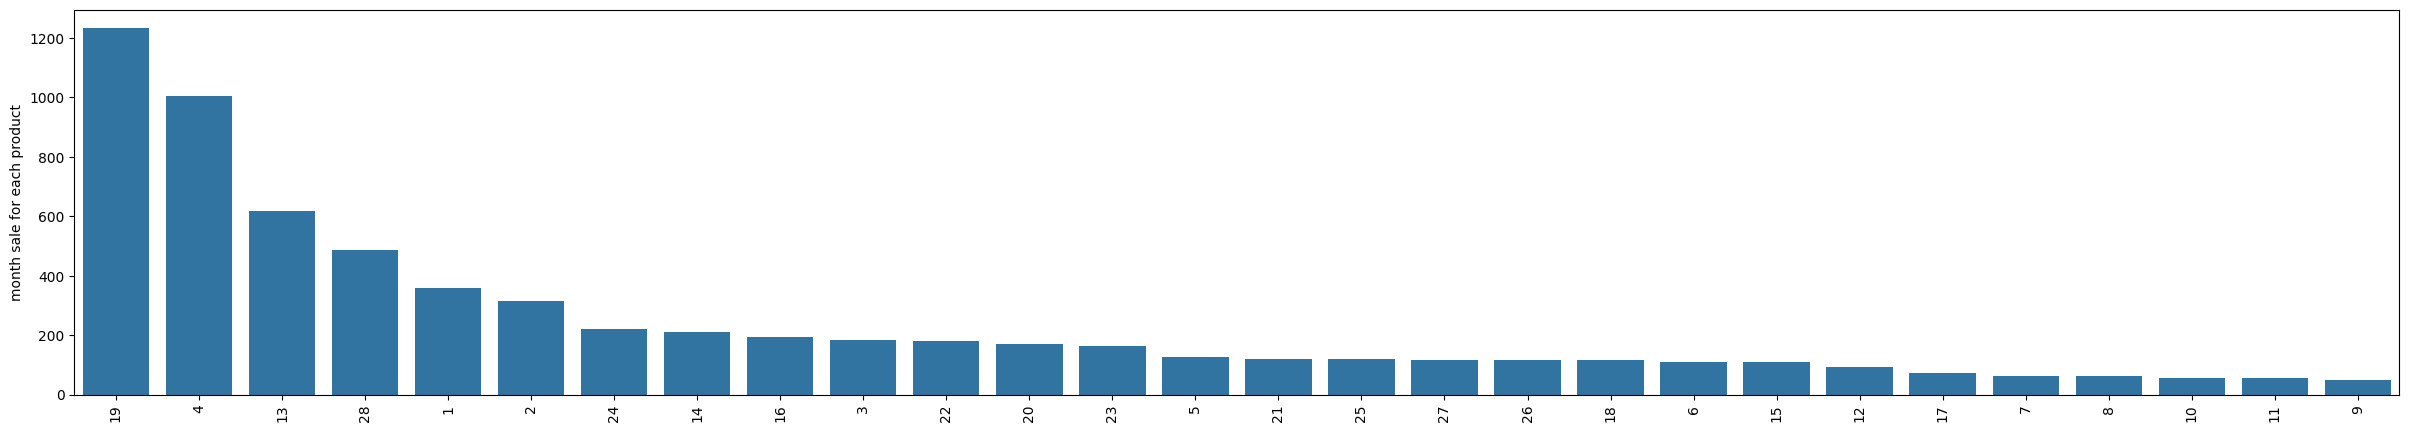

In [17]:
des_plot("平均月銷售", "month sale for each product")

In [18]:
merge_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   編號            28 non-null     int64  
 1   112/9         28 non-null     float64
 2   112/10        28 non-null     float64
 3   112/11        28 non-null     float64
 4   112/12        28 non-null     float64
 5   113/1         28 non-null     float64
 6   113/2         28 non-null     float64
 7   113/3         28 non-null     float64
 8   113/4         28 non-null     float64
 9   淨利潤           28 non-null     float64
 10  商品類型_encoded  28 non-null     int32  
 11  內容類型_encoded  28 non-null     int32  
 12  商品售價          28 non-null     object 
 13  商品成本          28 non-null     object 
 14  銷售總額          28 non-null     float64
 15  計算銷售不為0的月份數量  28 non-null     int64  
 16  平均月銷售         28 non-null     int32  
 17  所有產品之銷售       28 non-null     int64  
 18  銷售佔比          28 non-null     fl

In [19]:
merge_all['平均月銷售'] = merge_all['平均月銷售'].astype(float)
merge_all['商品售價'] = merge_all['商品售價'].astype(float)
merge_all['商品成本'] = merge_all['商品成本'].astype(float)
merge_all['計算銷售不為0的月份數量'] = merge_all['計算銷售不為0的月份數量'].astype(float)
merge_all['y'] = merge_all['y'].astype(float)
merge_all['商品類型_encoded'] = merge_all['商品類型_encoded'].astype(float)
merge_all['內容類型_encoded'] = merge_all['內容類型_encoded'].astype(float)
merge_all['所有產品之銷售'] = merge_all['所有產品之銷售'].astype(float)
merge_all['編號'] = merge_all['編號'].astype(int)

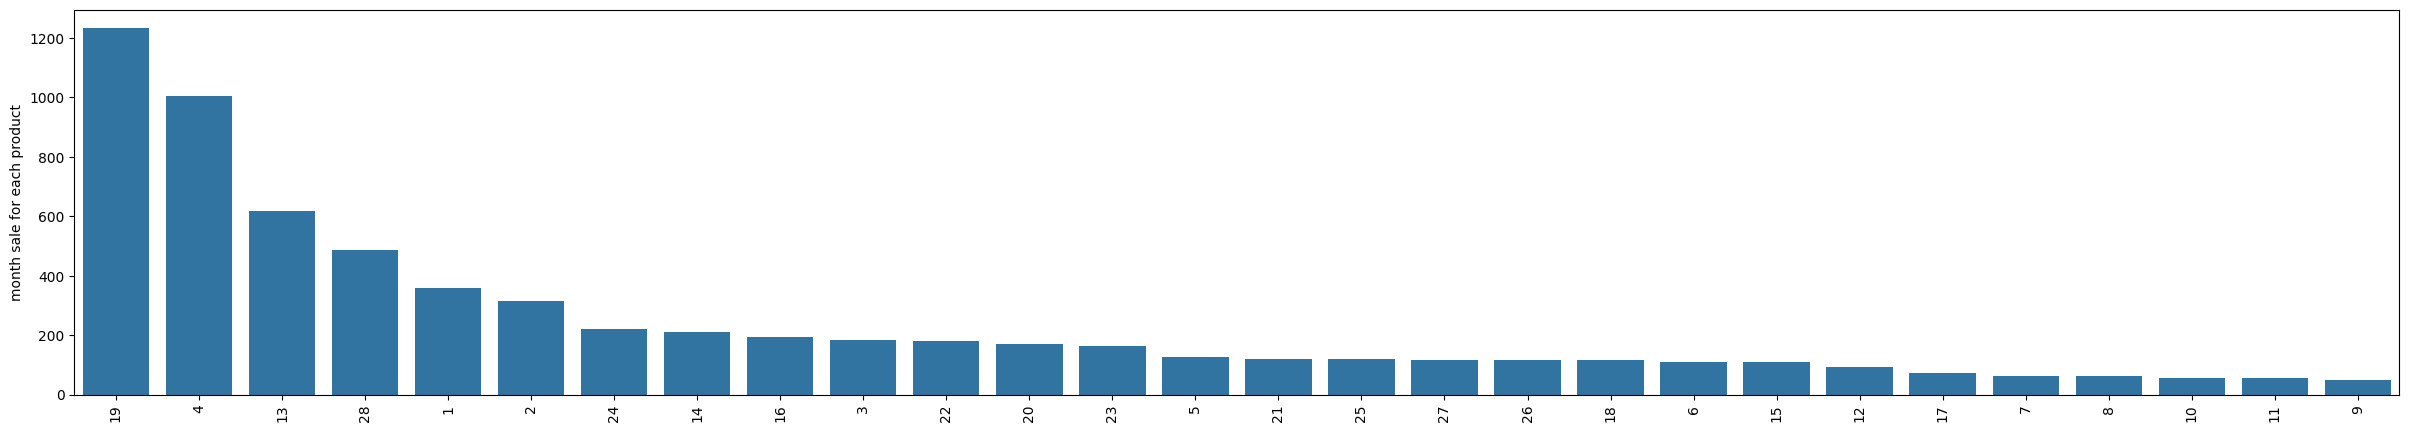

In [20]:
des_plot("平均月銷售", "month sale for each product")

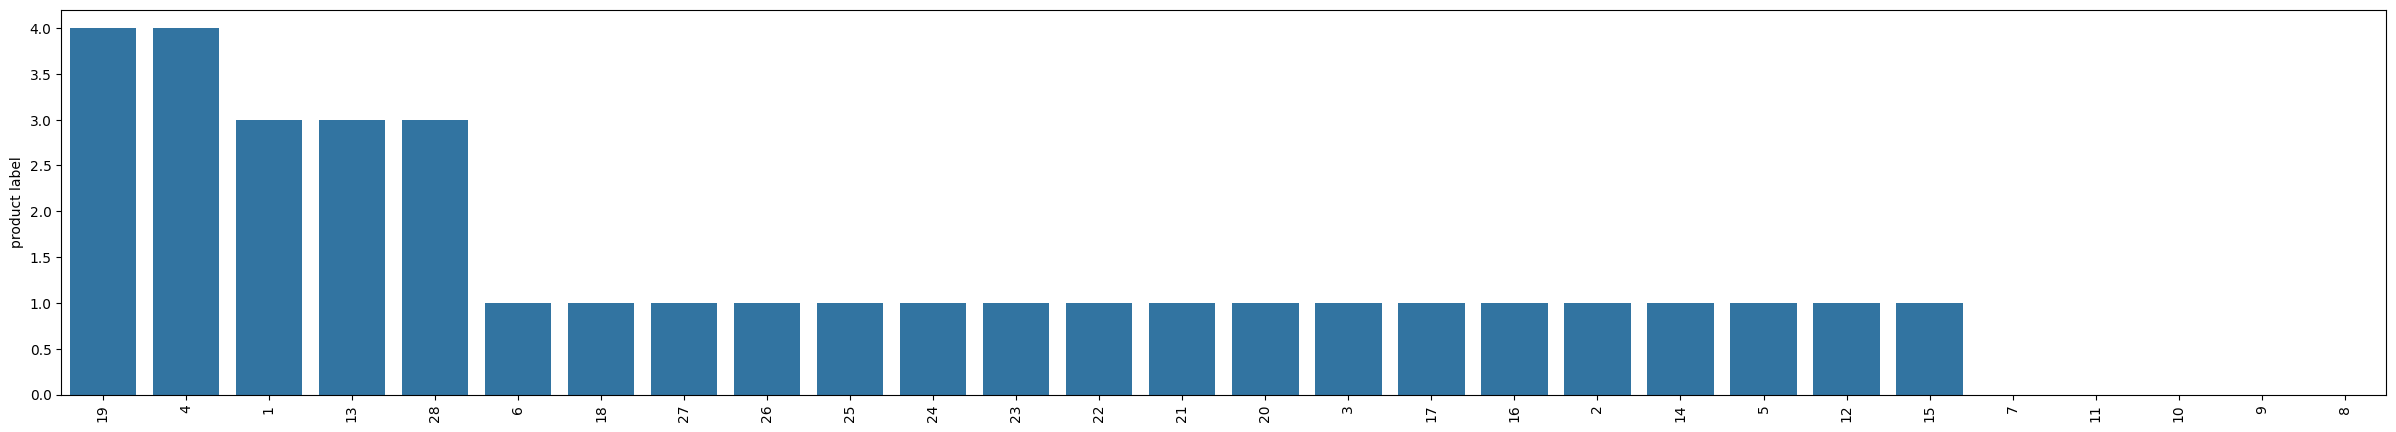

In [21]:
des_plot("y", "product label")

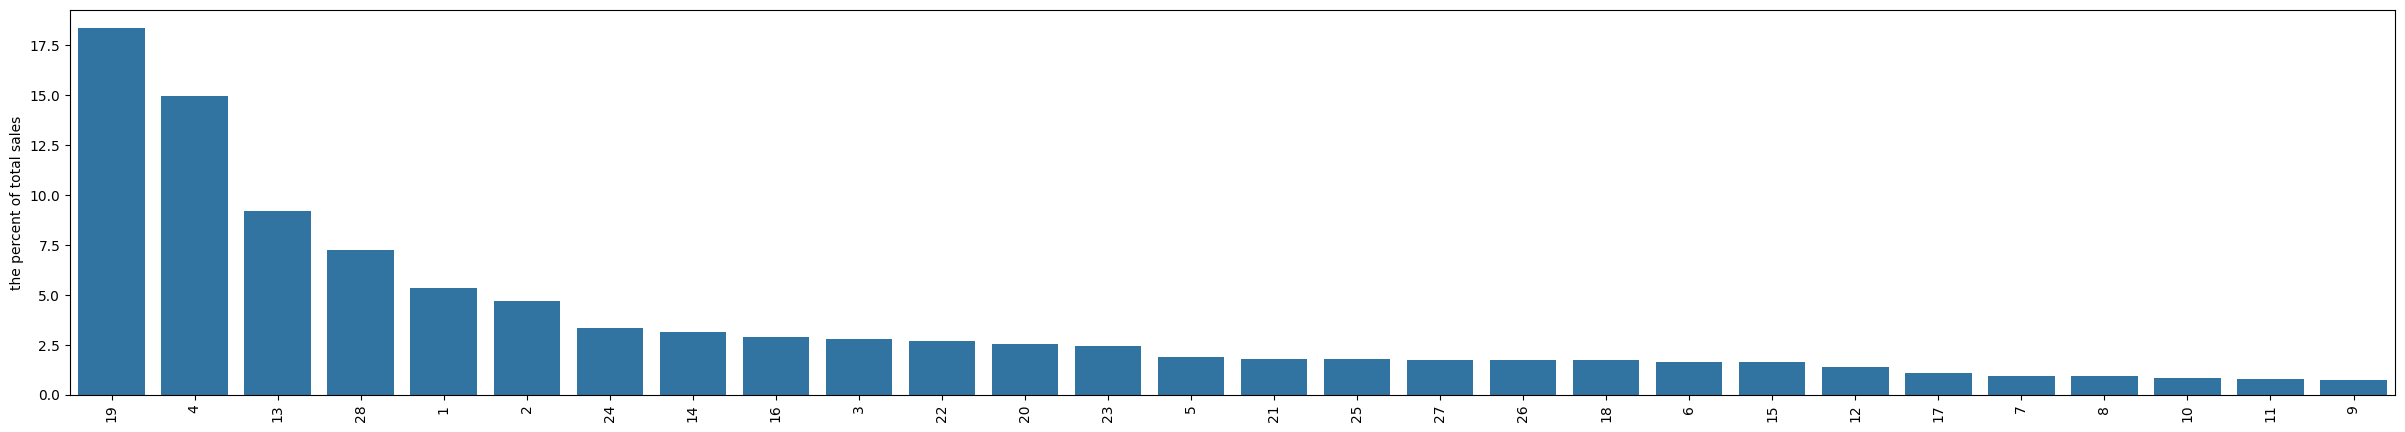

In [22]:
des_plot('銷售佔比','the percent of total sales')

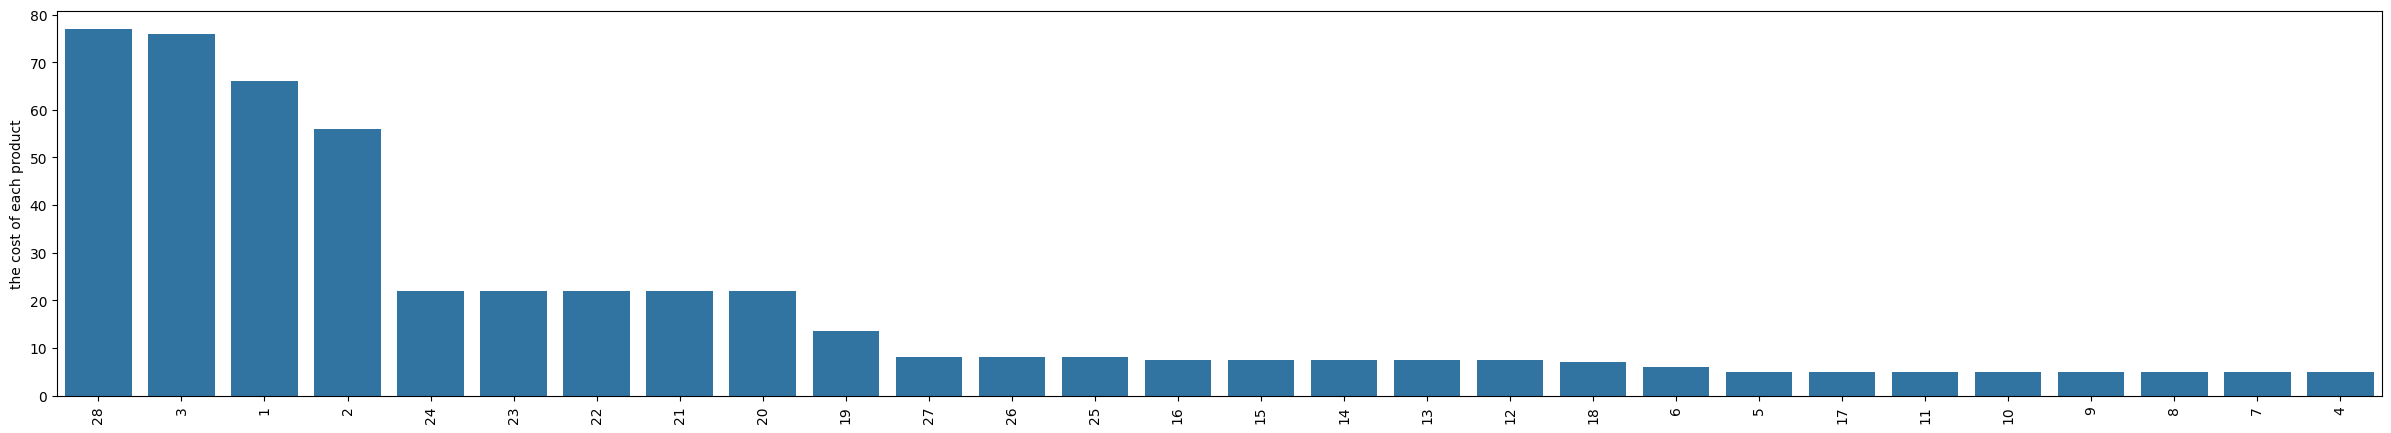

In [23]:
des_plot("商品成本","the cost of each product")

## 4.Modeling 
<font color= red size=5rem >問題: 資料集因為規模不夠大目前無法切分成訓練集、測試集 供模型辨別train的程度</font>  
4-1. 定義準備餵給模型的 datafram  
4-2. 切分XY  
4-3. modeling  
 - linear regrssion
 - random forest





In [24]:
merge_all.head(5)

,編號,112/9,112/10,112/11,112/12,113/1,113/2,113/3,113/4,淨利潤,商品類型_encoded,內容類型_encoded,商品售價,商品成本,銷售總額,計算銷售不為0的月份數量,平均月銷售,所有產品之銷售,銷售佔比,y
0,1,252.0,420.0,504.0,840.0,84.0,84.0,84.0,588.0,84.0,3.0,4.0,250.0,66.0,2856.0,8.0,357.0,6715.0,5.32,3.0
1,2,94.0,0.0,188.0,282.0,658.0,188.0,0.0,470.0,94.0,3.0,4.0,250.0,56.0,1880.0,6.0,313.0,6715.0,4.66,1.0
2,3,148.0,222.0,222.0,222.0,222.0,148.0,148.0,148.0,74.0,3.0,4.0,250.0,76.0,1480.0,8.0,185.0,6715.0,2.76,1.0
3,4,1426.0,1054.0,620.0,1240.0,0.0,155.0,1302.0,1240.0,31.0,2.0,2.0,60.0,5.0,7037.0,7.0,1005.0,6715.0,14.97,4.0
4,5,124.0,31.0,31.0,186.0,124.0,62.0,186.0,279.0,31.0,2.0,4.0,60.0,5.0,1023.0,8.0,127.0,6715.0,1.89,1.0


In [25]:
merge_all['商品類型_encoded'] = merge_all['商品類型_encoded'].astype(int)
merge_all['內容類型_encoded'] = merge_all['內容類型_encoded'].astype(int)
merge_all['y'] = merge_all['y'].astype(int)
merge_all['計算銷售不為0的月份數量'] = merge_all['計算銷售不為0的月份數量'].astype(int)

In [26]:
merge_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   編號            28 non-null     int32  
 1   112/9         28 non-null     float64
 2   112/10        28 non-null     float64
 3   112/11        28 non-null     float64
 4   112/12        28 non-null     float64
 5   113/1         28 non-null     float64
 6   113/2         28 non-null     float64
 7   113/3         28 non-null     float64
 8   113/4         28 non-null     float64
 9   淨利潤           28 non-null     float64
 10  商品類型_encoded  28 non-null     int32  
 11  內容類型_encoded  28 non-null     int32  
 12  商品售價          28 non-null     float64
 13  商品成本          28 non-null     float64
 14  銷售總額          28 non-null     float64
 15  計算銷售不為0的月份數量  28 non-null     int32  
 16  平均月銷售         28 non-null     float64
 17  所有產品之銷售       28 non-null     float64
 18  銷售佔比          28 non-null     fl

In [27]:
merge_all.columns

Index(['編號', '112/9', '112/10', '112/11', '112/12', '113/1', '113/2', '113/3',
       '113/4', '淨利潤', '商品類型_encoded', '內容類型_encoded', '商品售價', '商品成本', '銷售總額',
       '計算銷售不為0的月份數量', '平均月銷售', '所有產品之銷售', '銷售佔比', 'y'],
      dtype='object')

### 4-1.定義準備餵給模型的 datafram

In [28]:
droping_ready_to_get_model =['112/9', '112/10', '112/11', '112/12', '113/1', '113/2', '113/3','113/4','銷售總額', '平均月銷售', '所有產品之銷售', '銷售佔比']
model_data = merge_all.drop(columns=droping_ready_to_get_model)
model_data.head(5)

,編號,淨利潤,商品類型_encoded,內容類型_encoded,商品售價,商品成本,計算銷售不為0的月份數量,y
0,1,84.0,3,4,250.0,66.0,8,3
1,2,94.0,3,4,250.0,56.0,6,1
2,3,74.0,3,4,250.0,76.0,8,1
3,4,31.0,2,2,60.0,5.0,7,4
4,5,31.0,2,4,60.0,5.0,8,1


### 4-2.切分X Y
<font color = yellow>y 轉型成1*1 因為sklearn 模型需求</font>

In [29]:
X = model_data.iloc[: ,1:7].values
y = model_data.iloc[:, 7].values.reshape(-1,1)

### 4-3.Modelong
- linear regrssion(回歸 連續值)
- random forest(分類 類別選項)
  
<font size= 5rem>套模流程:</font>
1. 創建模型(依據需求)
2. 把資料集進行對數據的擬和(training)
3. 把擬和完成的模型利用(testing) 測試模型擬和程度(依據四大指標去評斷模型)
   1. 可做出模糊矩陣
   2. 有套件可以算出四大指標  
4. 給資料進行預測

<font size= 5rem>後記:</font>   
因為資料量不足產生以下問題:  
1. 所以沒有把資料切分成 training and testing，隨著未來資料量更大之時會改進整個分析流程(導致不確定模型訓練之好壞)
2. 資料量不夠大 導致預測可能失準(延上題)因為不確定模型擬和程度以及其評分所以不確定哪一個模型測出來的才是相較精確

#### linear regression  
(回歸並非分類)

In [30]:
from sklearn.linear_model import LinearRegression
regressor_linear = LinearRegression()
regressor_linear.fit(X, y)

LinearRegression()

In [31]:
import numpy as np
# 給值去做預測
to_be_predicted = np.array([
    [60.0,2,2,50.0,5.0,6]
])
predicted_charge = regressor_linear.predict(to_be_predicted)
print(predicted_charge)

[[1.21432014]]


#### Random forest

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# 創建隨機森林分類器
#1
clf_random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
#2
clf_random_forest.fit(X,y)
#4
to_be_predicted_rf = np.array([
    [60.0,2,2,50.0,5.0,6]
])

#印出預測之值
predict_class_rf = clf_random_forest.predict(to_be_predicted_rf)
print(predict_class_rf)

[0]


c:\Users\Wilson\anaconda3\envs\machine_learning_final2\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
